In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
start = datetime.datetime(2020,3,20)
end = datetime.datetime(2022,3,7)

In [3]:
XLY = web.DataReader('XLY', 'yahoo', start, end)
XLI = web.DataReader('XLI', 'yahoo', start, end)
XLE = web.DataReader('XLE', 'yahoo', start, end)
XLK = web.DataReader('XLK', 'yahoo', start, end)
XLF = web.DataReader('XLF', 'yahoo', start, end)
XLV = web.DataReader('XLV', 'yahoo', start, end)
XLU = web.DataReader('XLU', 'yahoo', start, end)
XLB = web.DataReader('XLB', 'yahoo', start, end)

In [4]:
# getting close price data

stocks = pd.concat([XLY['Close'], XLI['Close'], XLE['Close'], XLK['Close'], XLF['Close'], XLV['Close'], XLU['Close'], XLB['Close']], axis=1)
stocks.columns = ['XLY', 'XLI', 'XLE', 'XLK', 'XLF', 'XLV', 'XLU', 'XLB']
symbols = stocks.columns
stocks

,XLY,XLI,XLE,XLK,XLF,XLV,XLU,XLB
Date,,,,,,,,
2020-03-20,87.809998,51.400002,25.860001,71.419998,18.910000,79.089996,47.820000,40.680000
2020-03-23,87.529999,48.770000,23.570000,70.400002,17.660000,74.620003,44.930000,38.349998
2020-03-24,95.739998,54.939999,27.350000,77.610001,19.850000,80.370003,49.759998,42.860001
2020-03-25,97.419998,57.830002,28.639999,77.510002,20.389999,81.440002,51.029999,43.860001
2020-03-26,101.449997,61.480000,30.389999,82.309998,21.670000,86.849998,55.380001,45.919998
...,...,...,...,...,...,...,...,...
2022-03-01,174.740005,98.400002,71.290001,150.990005,37.099998,129.240005,67.339996,81.459999
2022-03-02,178.410004,100.500000,72.919998,154.259995,38.060001,131.190002,68.160004,83.250000
2022-03-03,174.369995,100.610001,73.120003,152.419998,37.939999,131.860001,69.360001,83.349998


In [5]:
# calculating returns data from the close price data 

returns =  (stocks - stocks.shift(1)) /stocks.shift(1)
print(returns)

# and then calcualting log returns because to promote comparability between stocks with low prices and high prices.
# NOTE THERE IS SOMETHING WRONG WITH LOG RETURNS RIGHT NOW I WILL NEED TO FIX LATER - ITS SHOWING MANY NaN values
# I WILL COMMENT OUT logReturns for now and make it equal to normal returns
logReturns = returns
# logReturns = np.log(returns)
print(logReturns)

                 XLY       XLI       XLE       XLK       XLF       XLV  \
Date                                                                     
2020-03-20       NaN       NaN       NaN       NaN       NaN       NaN   
2020-03-23 -0.003189 -0.051167 -0.088554 -0.014282 -0.066103 -0.056518   
2020-03-24  0.093796  0.126512  0.160373  0.102415  0.124009  0.077057   
2020-03-25  0.017548  0.052603  0.047166 -0.001288  0.027204  0.013313   
2020-03-26  0.041367  0.063116  0.061103  0.061927  0.062776  0.066429   
...              ...       ...       ...       ...       ...       ...   
2022-03-01 -0.015161 -0.014916  0.010059 -0.019991 -0.036864 -0.005540   
2022-03-02  0.021003  0.021341  0.022864  0.021657  0.025876  0.015088   
2022-03-03 -0.022645  0.001095  0.002743 -0.011928 -0.003153  0.005107   
2022-03-04 -0.015886 -0.002187  0.028857 -0.017517 -0.018714  0.005005   
2022-03-07 -0.049009 -0.026796  0.014755 -0.036594 -0.036530 -0.017431   

                 XLU       XLB  
Date

In [6]:
# sharpe ratio
# we are interested in solving for the weights

In [7]:
# return vs volatility chart
no_of_portfolios = 10000
no_of_stocks = 8
weight = np.zeros((no_of_portfolios,no_of_stocks)) # we need to initialise the weight array used later
mean_log_returns = logReturns.mean()
std_dev_returns = logReturns.cov()
expectedReturn = np.zeros(no_of_portfolios)
expectedVolatality = np.zeros(no_of_portfolios)
sharpRatio = np.zeros(no_of_portfolios)



for k in range(no_of_portfolios):
    # generate random weight vector
    w = np.array(np.random.random(no_of_stocks))
    w = w / np.sum(w) # we need to normalise so the sum of the weights = 1
    weight[k,:] = w
    # expected log return
    expectedReturn[k] = np.sum(mean_log_returns * w)
    # expected volatility
    expectedVolatality[k] = np.sqrt( np.dot(w.T, np.dot(std_dev_returns, w)) )
    # sharpe ratio
    sharpRatio[k] = expectedReturn[k]/ expectedVolatality[k]


In [8]:
# now we want to figure out the max sharpe ratio

In [9]:
maxIndex = sharpRatio.argmax()
print(weight[maxIndex, :]) # this produces a vector that maxes for sharpe ratio aka we want .31 in stock1 0.42 in stock2 etc

[0.0873445  0.04401465 0.32527936 0.2702478  0.00474969 0.19123369
 0.0161905  0.06093981]


In [10]:
# now lets plot the returns vs volatility chart

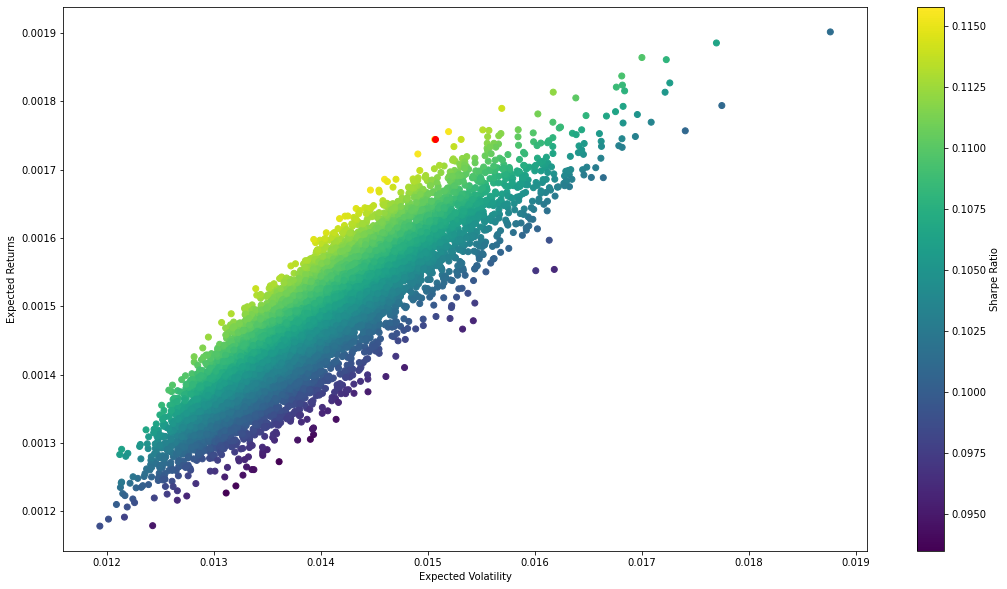

In [11]:
plt.figure(figsize=(18,10))
plt.scatter(expectedVolatality, expectedReturn, c=sharpRatio) # c = sharpRatio makes a color map of where the high sharpe ratio is
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label = 'Sharpe Ratio') # legend for the color map
plt.scatter(expectedVolatality[maxIndex], expectedReturn[maxIndex], c ='red') # plotting the max sharpe ratio point
plt.show()

In [12]:
# efficient Markowitz Frontier
# we are finding a value of w which minimises volatility for the maximum possible given return
# another way of thinking about this is finding the weights of the  portfolio with the highest sharpe ratio for each volatility
# we can do this with the minimize funciton from scipy. we are going to minimize the negative Sharpe Ratio, w0 is our initial guess
# keep in mind that minimize returns a w (weights) vector. check each solution to see if it sums to 1 or not
# we are subject to box constraints on w

In [13]:


def negativeSR(w):
    w = np.array(w)  # this gives w in a format we can work with
    R = np.sum(mean_log_returns * w) # sum of our mean log returns multiplied by our weights
    V = np.sqrt( np.dot(w.T, np.dot(std_dev_returns, w)) )
    SR = R/V
    return -1 * SR

def checkSumToOne(w):
    return np.sum(w)-1 #if its 1 as it should be it returns 0

w0 = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] #this is an intial guess
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1))
constraints = ({'type': 'eq', 'fun':checkSumToOne}) #define a type and a function

w_opt = minimize(negativeSR, w0, method='SLSQP', bounds= bounds, constraints = constraints)
w_opt

     fun: -0.11718174050438183
     jac: array([ 3.61977145e-05,  8.35412182e-03, -6.63427636e-05, -2.31293030e-04,
        1.69269796e-02,  3.87207605e-04,  7.63942208e-03,  1.79488957e-03])
 message: 'Optimization terminated successfully'
    nfev: 117
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([3.90066076e-02, 3.38271078e-17, 3.14611837e-01, 3.73196939e-01,
       0.00000000e+00, 2.73184617e-01, 1.94072189e-17, 0.00000000e+00])

In [14]:
# the above is the solution 
# it took 10 iterations to find the solution
# the optimal portfolio is pretty close to our max sharpe ratio method
w_opt.x

array([3.90066076e-02, 3.38271078e-17, 3.14611837e-01, 3.73196939e-01,
       0.00000000e+00, 2.73184617e-01, 1.94072189e-17, 0.00000000e+00])

In [15]:
print(weight[maxIndex, :])
print(type(w_opt.x))
print('optimal portfolio weights')
print(np.round(w_opt.x, 2))
print(np.round(weight[maxIndex, :], 2))

[0.0873445  0.04401465 0.32527936 0.2702478  0.00474969 0.19123369
 0.0161905  0.06093981]
<class 'numpy.ndarray'>
optimal portfolio weights
[0.04 0.   0.31 0.37 0.   0.27 0.   0.  ]
[0.09 0.04 0.33 0.27 0.   0.19 0.02 0.06]


In [16]:
# plotting the efficient frontier
# calculating the lowest volatility for each return

In [17]:
returns = np.linspace(0.0011,0.00265,50) # the returns we are calculating between and also how many points on the frontier we want
volatility_opt = []

def minimizeMyVolatility(w):
    w = np.array(w) 
    V = np.sqrt( np.dot(w.T, np.dot(std_dev_returns, w)) )
    return V

def getReturn(w):
    w = np.array(w) 
    R = np.sum(mean_log_returns * w) 
    return R

for R in returns:
    # find best volatility
    constraints = ({'type': 'eq', 'fun':checkSumToOne},
                  {'type': 'eq', 'fun': lambda w: getReturn(w) - R}) #define a type and a function
    opt = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds= bounds, constraints = constraints) # the constraints will be a bit different this time because we are minimising volatility we need a constraint on returns
    # save my optimal volatility
    volatility_opt.append(opt['fun']) # stack all those optimal volaility values in volatility opt array

In [18]:
# plotting the graph again

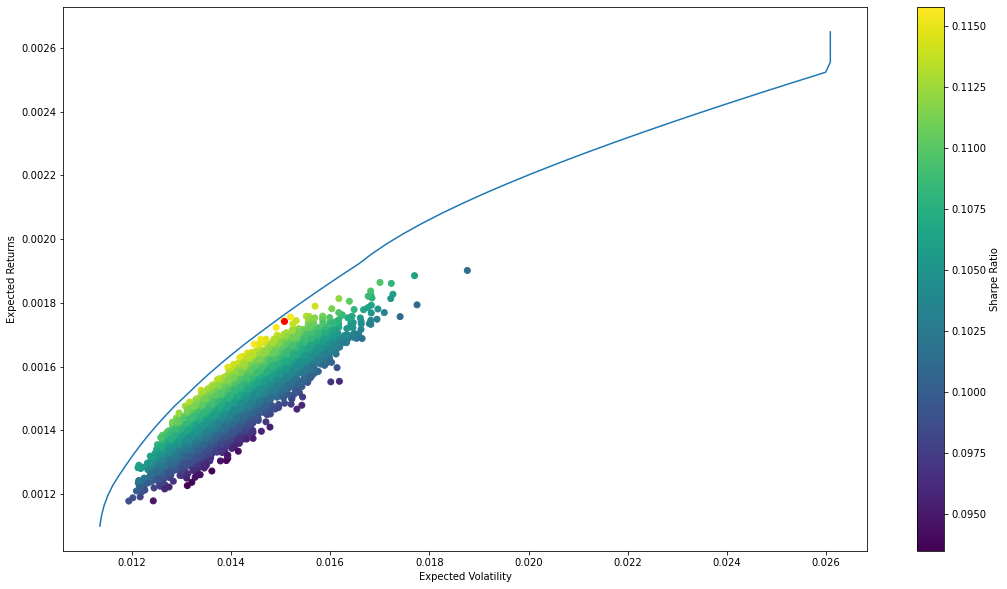

In [19]:
plt.figure(figsize=(18,10))
plt.scatter(expectedVolatality, expectedReturn, c=sharpRatio) # c = sharpRatio makes a color map of where the high sharpe ratio is
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label = 'Sharpe Ratio') # legend for the color map
plt.scatter(expectedVolatality[maxIndex], expectedReturn[maxIndex], c ='red') # plotting the max sharpe ratio point
plt.plot(volatility_opt, returns)
plt.show()

In [20]:
# plotting the ETF's on the chart


In [21]:
mean_log_returns
type(mean_log_returns)

pandas.core.series.Series

In [22]:
new_std_returns = logReturns.std()

In [23]:
test = pd.concat([new_std_returns, mean_log_returns], axis= 1)
print(test)
x_values = test[0].values.tolist()
y_values =  test[1].values.tolist()


            0         1
XLY  0.014789  0.001364
XLI  0.015629  0.001421
XLE  0.026084  0.002528
XLK  0.016413  0.001558
XLF  0.017944  0.001456
XLV  0.011698  0.001078
XLU  0.014627  0.000929
XLB  0.015795  0.001498


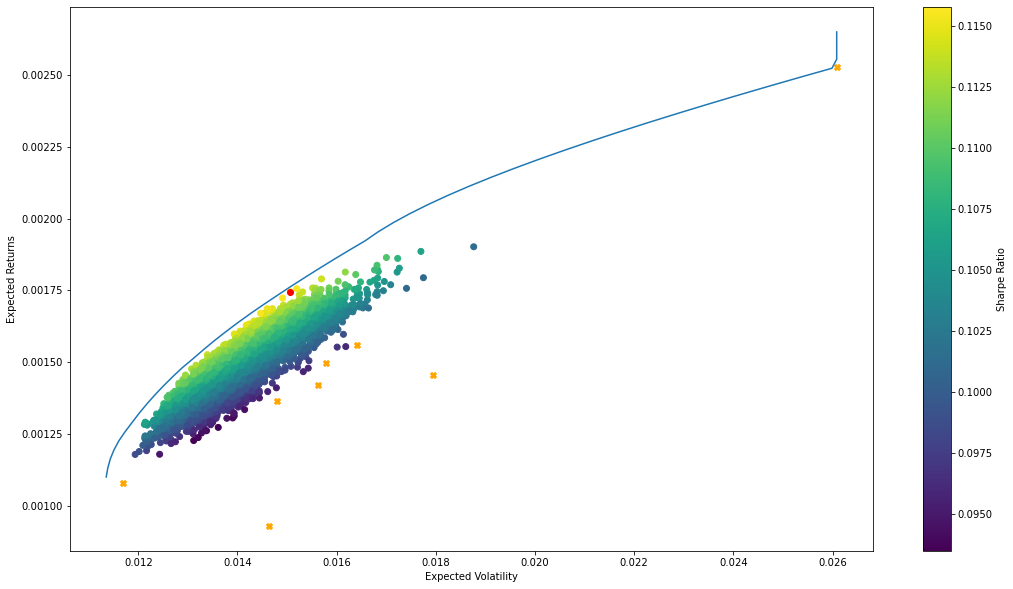

In [24]:
plt.figure(figsize=(18,10))
plt.scatter(expectedVolatality, expectedReturn, c=sharpRatio) # c = sharpRatio makes a color map of where the high sharpe ratio is
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label = 'Sharpe Ratio') # legend for the color map
plt.scatter(expectedVolatality[maxIndex], expectedReturn[maxIndex], c ='red') # plotting the max sharpe ratio point
plt.scatter(x_values, y_values, marker = 'X', color = 'orange')
plt.plot(volatility_opt, returns)
plt.show()

<class 'pandas.core.indexes.base.Index'>


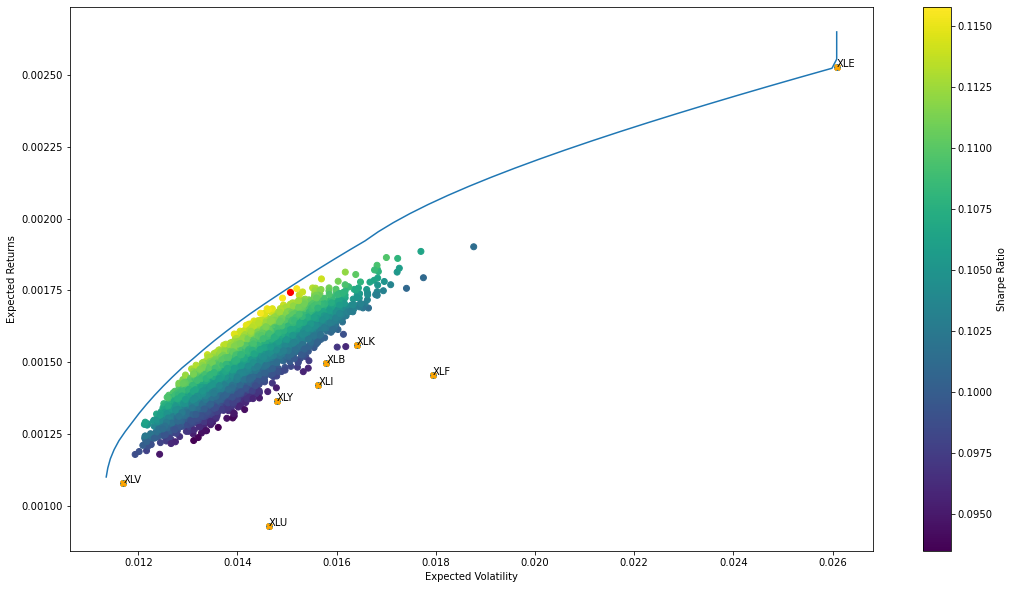

('XLY - Consumer Discretionary', 'XLI - Industrial', 'XLE - Energy', 'XLK - Technology', 'XLF - Financial', 'XLV - Health Care', 'XLU - Utilities', 'XLB - Materials')


In [25]:
print(type(symbols))
symbol_expansions = ("XLY - Consumer Discretionary", "XLI - Industrial", "XLE - Energy", "XLK - Technology", "XLF - Financial", "XLV - Health Care","XLU - Utilities", "XLB - Materials")


fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(x_values, y_values)


for i, symb in enumerate (symbols):
    ax.annotate(symbols[i], (x_values[i], y_values[i]))
plt.scatter(expectedVolatality, expectedReturn, c=sharpRatio) # c = sharpRatio makes a color map of where the high sharpe ratio is
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label = 'Sharpe Ratio') # legend for the color map
plt.scatter(expectedVolatality[maxIndex], expectedReturn[maxIndex], c ='red') # plotting the max sharpe ratio point
plt.scatter(x_values, y_values, marker = 'X', color = 'orange')
plt.plot(volatility_opt, returns)
plt.show()
plt.show()
print(symbol_expansions)

In [26]:
#                      WEIGHTING SOLVER                            #

In [29]:
pBar = logReturns.mean()
Sigma = logReturns.cov()
rMin = 0.00175

def riskFunction(w):
    return np.dot(w.T,np.dot(Sigma, w))

w0 = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

def checkMinimumReturn(w):
    RHS = rMin - np.sum(pBar * w)
    return RHS
def checkSumToOne(w):
    return np.sum(w) - 1

constraints = ({'type':'eq', 'fun':checkMinimumReturn},{'type':'eq', 'fun':checkSumToOne})

w_opt = minimize(riskFunction, w0, method='SLSQP', bounds=bounds, constraints=constraints)

In [30]:
w_scipy = w_opt.x

print(w_scipy)

weights_in_pct = ["%.2f"%(i * 100) for i in w_scipy]
print(weights_in_pct)
risk_ = riskFunction(w_scipy)
print(risk_)


[0.10538728 0.11512547 0.30403888 0.13853016 0.12102107 0.05654868
 0.03111192 0.12823656]
['10.54', '11.51', '30.40', '13.85', '12.10', '5.65', '3.11', '12.82']
0.0002559441781181626
